In [1]:
# enable reload the module
%load_ext autoreload
%autoreload 2

In [2]:
from tools.mtr_inference import MTRInference
from tools.mtr_lightning import MTR_Lightning
import torch
import matplotlib.pyplot as plt
import imageio.v2 as imageio
import os
import numpy as np
from torch.distributions import MultivariateNormal

# Interesting case:
1. Val, 6, 2d84b1ab55ab81d3, U-turn vs Left-turn
2. Val, 7, 3505972c220e6b3a, Turn vs Striaght for merging
3. Val, 25, 6d2a107f2e8390a, Merge to main road
4. Val, 26, ae92386e0686d4d6, Complicated 4-way stop
5. Val, 27, 3d00a93f0ba5e294, Both car merge to main road
6. Val, 36, 31d18fac4011375c, illegal merging to the main road

In [37]:
cfg_file = 'tools/cfgs/waymo/eval.yaml'
ckpt_path = 'model/checkpoint_epoch_30.pth'
mtr_inference = MTRInference(cfg_file)
_ = mtr_inference.model.cuda()
mtr_inference.load_from_params(ckpt_path)


=========== MTR Inference ===========
==> Loading parameters from checkpoint model/checkpoint_epoch_30.pth to GPU
==> Checkpoint trained from version: none
The number of disk ckpt keys: 842
Missing keys: []
The number of missing keys: 0
The number of unexpected keys: 0
==> Done (total keys 842)


num_center_objects: 8, num_objects: 99
before tensor([[ 2.7005e-01,  6.2088e-03, -5.2687e-05,  ..., -1.9620e-03,
         -2.0416e-03,  7.2075e-03],
        [ 2.7005e-01,  6.2088e-03, -5.2687e-05,  ..., -1.9620e-03,
         -2.0416e-03,  7.2075e-03],
        [ 2.7005e-01,  6.2088e-03, -5.2687e-05,  ..., -1.9620e-03,
         -2.0416e-03,  7.2075e-03],
        ...,
        [ 2.7005e-01,  6.2088e-03, -5.2687e-05,  ..., -1.9620e-03,
         -2.0416e-03,  7.2075e-03],
        [ 2.7005e-01,  6.2088e-03, -5.2687e-05,  ..., -1.9620e-03,
         -2.0416e-03,  7.2075e-03],
        [ 2.7005e-01,  6.2088e-03, -5.2687e-05,  ..., -1.9620e-03,
         -2.0416e-03,  7.2075e-03]], device='cuda:0')
ca tensor([[ 4.0886, -0.5119, -0.0657,  ..., -0.6565,  1.3918, -0.3357],
        [ 4.3715,  0.5802,  0.2389,  ..., -1.2868,  1.7525, -1.1699],
        [ 4.2147, -0.0843,  1.4880,  ..., -0.3329,  1.6113,  0.5241],
        ...,
        [ 4.1536,  0.3713,  0.4626,  ..., -1.2100,  2.0885,  0.0174],
        [

('c37fa6a0a21345f3',
 <Figure size 800x800 with 1 Axes>,
 <AxesSubplot: title={'center': 'Scene c37fa6a0a21345f3 at 1.0 seconds'}>)

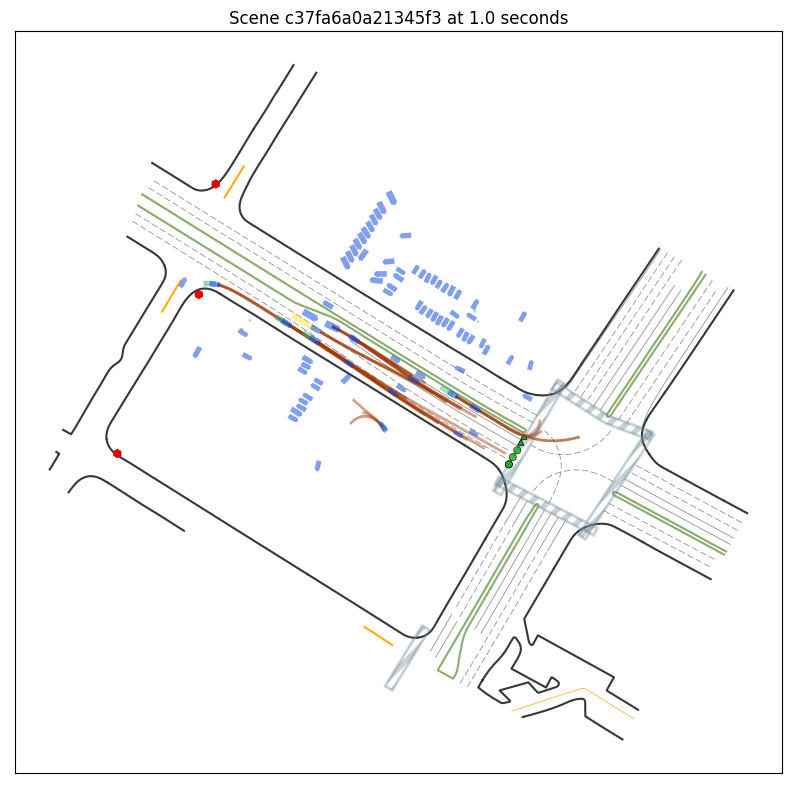

In [40]:

index = 10
scene_id, info = mtr_inference.generate_info(index)
shift = 0
mtr_inference.visualize(scene_id, info, shift=shift)